In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import gc
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [4]:
questions = pd.read_csv('./train.csv')
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [5]:
questions.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [18]:
questions['lengths'] = questions.question_text.apply(len)

### Hypothesis - Slightly longer texts are insincere

In [ ]:
sns.boxplot(questions.lengths)

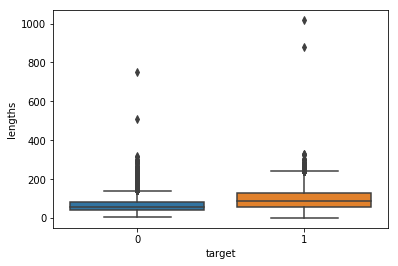

In [19]:
sns.boxplot(data=questions, x = 'target', y = 'lengths')

In [21]:
questions[['target','lengths']].groupby('target').median()

,lengths
target,
0,59
1,86


In [45]:
max_len = max(questions.lengths)
max_len

1017

### Embeddings

In [30]:
embeddings = dict()
file = open('./glove.840B.300d/glove.840B.300d.txt', encoding='UTF-8')
for line in file:
    values = line.split(" ")
    word, coefs  = values[0], np.array(values[1:], dtype='float32')
    embeddings[word] = coefs

In [43]:
tkn = Tokenizer()
tkn.fit_on_texts(questions.question_text)
vocab_size = len(tkn.word_index) + 1
enc_sentence = tkn.texts_to_sequences(questions.question_text)
enc_sentence = pad_sequences(enc_sentence, max_len)

In [48]:
embed_matrix = np.zeros((vocab_size, 300))
for word, i in tkn.word_index.items():
    vec = embeddings.get(word)
    if(vec is not None):
        embed_matrix[i] = vec

In [ ]:
word_vec = np.array([embed_matrix[l] for w in enc_sentence.tolist() for l in w])